# Weekelijkse opdracht 

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_csv('News.csv')
df = df[["num_imgs","average_token_length","is_weekend","data_channel_is_entertainment","title_subjectivity","shares_log"]]
df = df.dropna()
df.head()

,num_imgs,average_token_length,is_weekend,data_channel_is_entertainment,title_subjectivity,shares_log
0,12,4.518879,0,0,0.666667,3.322219
1,6,5.040900,0,0,0.000000,2.437751
2,0,4.877863,0,0,0.000000,3.176091
3,2,4.974820,0,0,0.000000,3.301030
4,18,4.928409,0,0,0.000000,3.778151


Ik heb een bepaald aantal variablen gebruikt voor deze opdracht waarvan ik denk dat ze veel met het aantal shares te maken hebben. Ik denk dat afbeeldingen belangrijk zijn en het de lengte van de titel. Daarnaast hebben mensen in het weekend meer tijd dus heb ook de dummie variabel weekend gebruikt. Daarnaast zijn mensen gefocused op entertainment. De rest heb ik buiten beschouwing gelaten omdat anders mn computer het niet aan kon. 

Lineare regressie is het in kaart brengen van een relatie tussen twee variabelen. Dit wordt gedaan door een model op te stellen. Dit model is vaak een rechte lijn die zo dicht mogelijk langs alle variabelen gaat. 

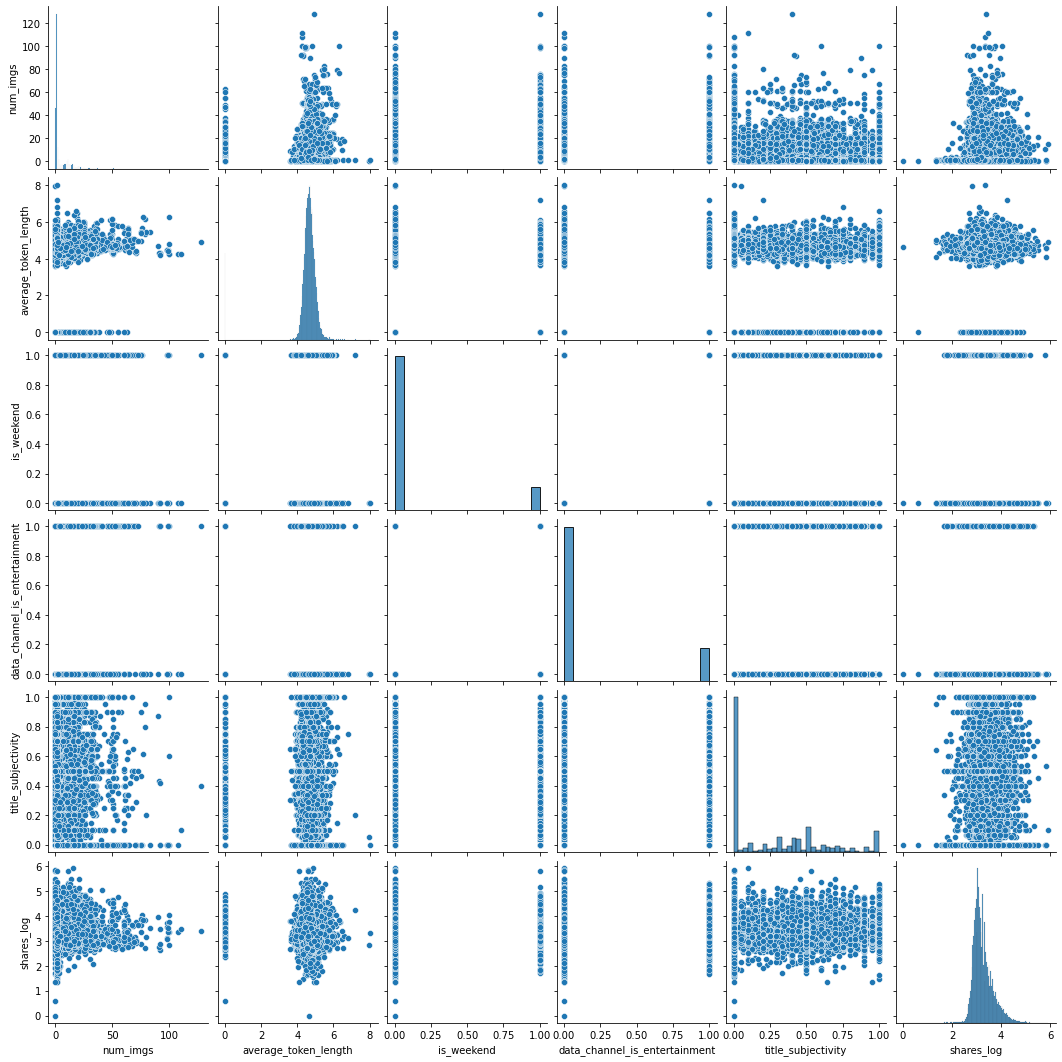

In [23]:
sns.pairplot(df)
plt.show()

Geen van de plots lijkt een lineare verband te hebben met het aantal shares. 

In [24]:
y= df["shares_log"]
x= df.loc[:,"num_imgs":"title_subjectivity"]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 
x_train.head()

,num_imgs,average_token_length,is_weekend,data_channel_is_entertainment,title_subjectivity
20921,0,4.560284,1,0,0.500000
4485,9,4.732143,0,0,0.100000
17755,1,4.710611,0,0,0.000000
4704,23,4.669323,0,0,0.454545
13493,13,4.511702,0,0,0.750000


In [32]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)

b0 = lm.intercept_ #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0] #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X")

The regression line is equal to y = 3.32 + 0.00X


In [33]:

df['Prediction'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head()

,num_imgs,average_token_length,is_weekend,data_channel_is_entertainment,title_subjectivity,shares_log,Prediction
0,12,4.518879,0,0,0.666667,3.322219,3.309452
1,6,5.040900,0,0,0.000000,2.437751,3.236504
2,0,4.877863,0,0,0.000000,3.176091,3.213651
3,2,4.974820,0,0,0.000000,3.301030,3.220348
4,18,4.928409,0,0,0.000000,3.778151,3.291685


In [34]:
df["resid"] = df["shares_log"] - df["Prediction"]
df.head()

,num_imgs,average_token_length,is_weekend,data_channel_is_entertainment,title_subjectivity,shares_log,Prediction,resid
0,12,4.518879,0,0,0.666667,3.322219,3.309452,0.012767
1,6,5.040900,0,0,0.000000,2.437751,3.236504,-0.798753
2,0,4.877863,0,0,0.000000,3.176091,3.213651,-0.037560
3,2,4.974820,0,0,0.000000,3.301030,3.220348,0.080682
4,18,4.928409,0,0,0.000000,3.778151,3.291685,0.486466


In [28]:
coef = pd.DataFrame(x.columns.values, lm.coef_)
coef

,0
0.004396,num_imgs
-0.021610,average_token_length
0.125131,is_weekend
-0.101411,data_channel_is_entertainment
0.052938,title_subjectivity


In [29]:
y_test_p = lm.predict(x_test)
r2_score(y_test, y_test_p)

0.028041279642949002

In [30]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.40029828027223957

Pretty shit stats lol

C:\Users\Marco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


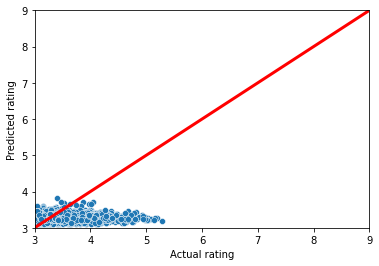

In [31]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.xlim([3,9]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([3,9])
plt.plot([3, 9], [3, 9], color='red', lw=3) #Plot a diagonal length
plt.show()